In [1]:
import numpy as np
import scipy.io as sio
import moviepy as mpy
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib.pyplot as plt

In [ ]:
# Install a pip package in the current Jupyter kernel if package isnt instsalled
import sys
!{sys.executable} -m pip install moviepy

In [2]:
# Load data and define variables 
ds = sio.loadmat('cell_29.mat')['export_struct'][0,0]

trial = np.random.choice(ds['thetaAtBase'].shape[1],1)[0]
x = np.arange(0,len(ds['thetaAtBase']))
amplitude_mask = ds['amplitude'][:,trial]<5
filtered_phase = ds['phase'][:,trial]
filtered_phase[amplitude_mask] = np.nan 

y0 = ds['thetaAtBase'][:,trial]
y1 = ds['amplitude'][:,trial]
y2 = ds['setpoint'][:,trial]
y3 = ds['phase'][:,trial]
y4 = ds['spikes_trace'][:,trial]

                                                                    
t:   0%|          | 1/4000 [1:01:20<4087:59:59, 3680.12s/it, now=None]
                                                                      
t:  10%|█         | 406/4000 [1:00:12<03:41, 16.26it/s, now=None]

t:   0%|          | 0/400 [00:00<?, ?it/s, now=None]

Moviepy - Building video trial_animation.mp4.
Moviepy - Writing video trial_animation.mp4





t:   0%|          | 2/400 [00:00<02:00,  3.29it/s, now=None]

t:   1%|          | 4/400 [00:00<01:32,  4.27it/s, now=None]

t:   2%|▏         | 6/400 [00:00<01:13,  5.35it/s, now=None]

t:   2%|▏         | 8/400 [00:01<00:59,  6.59it/s, now=None]

t:   2%|▎         | 10/400 [00:01<00:51,  7.59it/s, now=None]

t:   3%|▎         | 12/400 [00:01<00:43,  8.86it/s, now=None]

t:   4%|▎         | 14/400 [00:01<00:38, 10.09it/s, now=None]

t:   4%|▍         | 16/400 [00:01<00:34, 11.07it/s, now=None]

t:   4%|▍         | 18/400 [00:01<00:33, 11.54it/s, now=None]

t:   5%|▌         | 20/400 [00:01<00:31, 12.16it/s, now=None]

t:   6%|▌         | 22/400 [00:02<00:30, 12.59it/s, now=None]

t:   6%|▌         | 24/400 [00:02<00:28, 13.13it/s, now=None]

t:   6%|▋         | 26/400 [00:02<00:27, 13.60it/s, now=None]

t:   7%|▋         | 28/400 [00:02<00:27, 13.77it/s, now=None]

t:   8%|▊         | 30/400 [00:02<00:26, 13.78it/s, now=None]

t:   8%|▊         | 32/400 [00:02<00:26, 13.84it/s, now=N

t:  59%|█████▉    | 236/400 [00:18<00:12, 12.76it/s, now=None]

t:  60%|█████▉    | 238/400 [00:18<00:12, 12.49it/s, now=None]

t:  60%|██████    | 240/400 [00:19<00:12, 12.50it/s, now=None]

t:  60%|██████    | 242/400 [00:19<00:12, 12.62it/s, now=None]

t:  61%|██████    | 244/400 [00:19<00:12, 12.66it/s, now=None]

t:  62%|██████▏   | 246/400 [00:19<00:12, 12.47it/s, now=None]

t:  62%|██████▏   | 248/400 [00:19<00:12, 12.27it/s, now=None]

t:  62%|██████▎   | 250/400 [00:19<00:12, 11.84it/s, now=None]

t:  63%|██████▎   | 252/400 [00:20<00:12, 12.16it/s, now=None]

t:  64%|██████▎   | 254/400 [00:20<00:12, 12.02it/s, now=None]

t:  64%|██████▍   | 256/400 [00:20<00:11, 12.30it/s, now=None]

t:  64%|██████▍   | 258/400 [00:20<00:11, 12.59it/s, now=None]

t:  65%|██████▌   | 260/400 [00:20<00:11, 12.71it/s, now=None]

t:  66%|██████▌   | 262/400 [00:20<00:10, 12.82it/s, now=None]

t:  66%|██████▌   | 264/400 [00:20<00:10, 12.80it/s, now=None]

t:  66%|██████▋   | 266/400 [00:21<00:10

Moviepy - Done !
Moviepy - video ready trial_animation.mp4


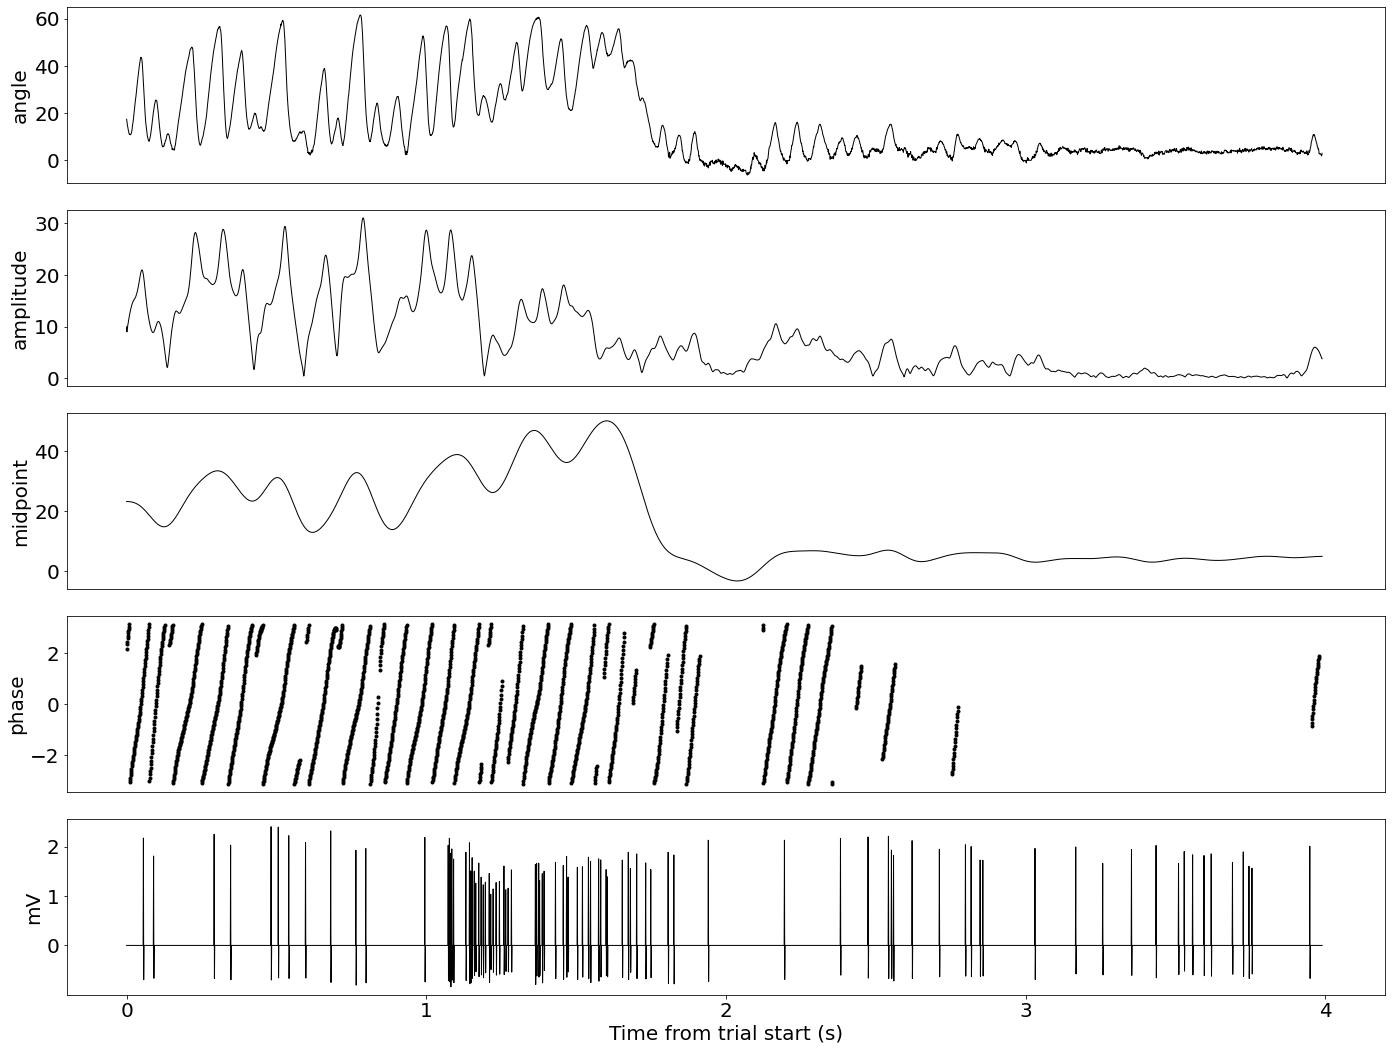

In [33]:
# top level definitions 
duration= 20 # duration of animation in seconds
img_height = 15
img_width = 20
plt.rcParams.update({'font.size':20})

# Set up plots for animation 
fig, ax = plt.subplots(5,1)
fig.set_figheight(img_height)
fig.set_figwidth(img_width)
l0, = ax[0].plot(x, y0, lw=1, c='k')
l1, = ax[1].plot(x, y1, lw=1, c='k')
l2, = ax[2].plot(x, y2, lw=1, c='k')
l3, = ax[3].plot(x, y3, 'k.')
l4, = ax[4].plot(x, y4, lw=1, c='k')

labels = ['angle', 'amplitude', 'midpoint', 'phase', 'mV']
for ix,k in enumerate(ax):
    ax[ix].set_xticks([])
    ax[ix].set_ylabel(labels[ix])
ax[4].set_xticks([0,1000,2000,3000,4000])
ax[4].set_xticklabels([0,1,2,3,4])
ax[4].set_xlabel("Time from trial start (s)")
fig.tight_layout() 

# Animate figure with moviepy 
def plot_until_t(t):
    t_idx = int((len(x)/duration) * t) #size of each step 
    for idx,val in enumerate(ax):
        exec('l' + str(idx) + '.set_xdata(x[:t_idx])')
        exec('l' + str(idx) + '.set_ydata(y' + str(idx) +'[:t_idx])')
    return mplfig_to_npimage(fig)

plotclip = VideoClip(plot_until_t, duration=duration)
plotclip.write_videofile('trial_animation.mp4', fps=20, codec='libx264', ffmpeg_params = ['-preset', 'veryslow','-crf','17'])
# plotclip.write_gif('trial_parameters.gif', fps=25)
# plotclip.ipython_display(fps=20, loop=True, autoplay=True,progress_bar=False)

In [21]:
len(x)


4000